In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('andromeda.jpg')

In [4]:
lower_val = np.array([0,0,0])
upper_val = np.array([40,40,100])

mask = cv2.inRange(img, lower_val, upper_val)

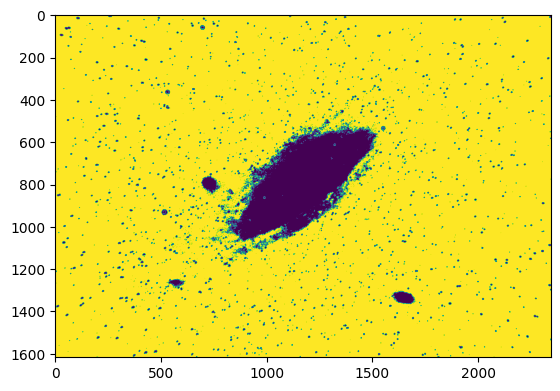

In [6]:
plt.imshow(mask)

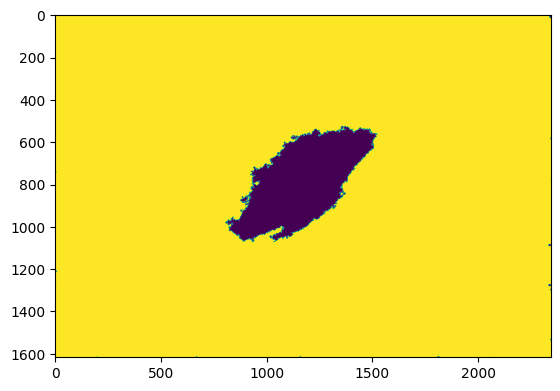

In [10]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []

for contour in contours:
    area = cv2.contourArea(contour)
    
    if area > 10000: #this is the val we can change
        selected_contours.append(contour)
        blank_image = np.zeros(mask.shape, np.uint8)
        cv2.fillPoly(blank_image, pts=selected_contours, 
                     color=(255, 255, 255))
        plt.imshow(blank_image)
        

In [18]:
rgb_mask = cv2.cvtColor(blank_image,cv2.COLOR_GRAY2RGB)
out_img = img * (1 - rgb_mask/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


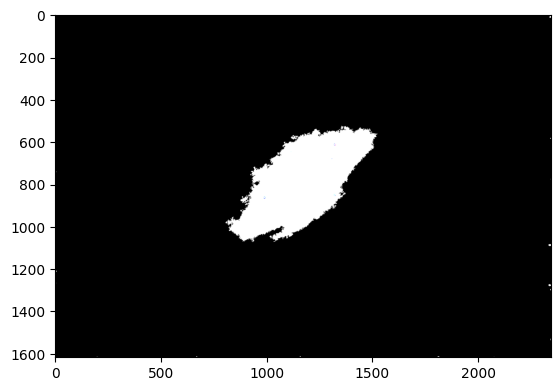

In [16]:
plt.imshow(out_img)